# Github Data Collection

Using the __GitHub API__, extract, from public repositories, information from user profile such as repositories and commits and save it into __.csv__.

Before start to fetching data you need to set 2 very important constants, the __user__ that'll be analised, and the github token;

## System Preparation 


### Import Library

Import required libraries, it depends of libraries installation. So, before run this notebook is recomended to run the command below inside this project home directory in a system terminal.

```bash
pip install -r requirements.txt
```

once installed all dependencies you'll be ready to run this notebook. 

In [1]:
from github.user import User
from github.repository import Repository
from github.commit import Commit
from github.languages import Languages 

### Data Extractor Initialization

Now you're ready to start extract data from __Github API__. To do that, initialize the extractors for __user__, __repository__ and __commit__. 

In [2]:
user = User()
repository = Repository()
commit = Commit()
languages = Languages()

## Data Loader

Using the __GitHub API__, extract, from public repositories, information from user profile such as repositories and commits and save it into __.csv__.

### User Information

Load and print basic git user data 

In [3]:
user_df = user.load().save().get()

### Repositories

Collect repository data.

In [4]:
repos_df = repository.load(user.getData()).save().get()
repos_df.head()

,Id,Name,Description,Created on,Updated on,Owner,License,Includes wiki,Forks count,Issues count,Stars count,Watchers count,Repo URL,Commits URL,Languages URL
0,50627775,alf-db-constraint,Database constraint to Alfresco Document Type,2016-01-29T01:27:23Z,2017-08-09T11:32:25Z,gsdenys,GNU Lesser General Public License v2.1,True,0,0,4,4,https://api.github.com/repos/gsdenys/alf-db-co...,https://api.github.com/repos/gsdenys/alf-db-co...,https://api.github.com/repos/gsdenys/alf-db-co...
1,39864719,alfresco-bulk-export,Automatically exported from code.google.com/p/...,2015-07-29T00:36:35Z,2019-09-19T11:17:25Z,gsdenys,GNU Lesser General Public License v3.0,False,32,17,11,11,https://api.github.com/repos/gsdenys/alfresco-...,https://api.github.com/repos/gsdenys/alfresco-...,https://api.github.com/repos/gsdenys/alfresco-...
2,197203698,amqp-client,Lua Client for AMQP,2019-07-16T13:52:44Z,2020-09-27T09:41:13Z,gsdenys,Apache License 2.0,True,7,6,5,5,https://api.github.com/repos/gsdenys/amqp-client,https://api.github.com/repos/gsdenys/amqp-clie...,https://api.github.com/repos/gsdenys/amqp-clie...
3,241175035,bpm-engine,Event drive engine for BPMN,2020-02-17T18:07:22Z,2020-02-17T18:23:29Z,gsdenys,Apache License 2.0,True,0,0,0,0,https://api.github.com/repos/gsdenys/bpm-engine,https://api.github.com/repos/gsdenys/bpm-engin...,https://api.github.com/repos/gsdenys/bpm-engin...
4,27539722,cmis-java-sample,Breve exemplo de ações usando OpenCMIS,2014-12-04T12:35:44Z,2015-03-23T14:09:08Z,gsdenys,None,True,0,0,1,1,https://api.github.com/repos/gsdenys/cmis-java...,https://api.github.com/repos/gsdenys/cmis-java...,https://api.github.com/repos/gsdenys/cmis-java...


### Commit

Collect commit data.

In [5]:
#commits_df = commit.load(repository.get()).save().get()
#commits_df.head()

### Languages

In [6]:
lang_df = languages.load(repository.get()).get()

In [7]:
lang_df.describe()

,Repo Id,Size
count,4.400000e+01,44.000000
mean,1.802693e+08,29647.000000
std,1.011453e+08,55185.847189
min,2.753972e+07,63.000000
25%,7.728421e+07,846.750000
50%,1.543203e+08,3904.500000
75%,2.633140e+08,23736.000000
max,3.345578e+08,217339.000000


In [8]:
l = lang_df.groupby("Language").sum()

l

,Repo Id,Size
Language,,
Batchfile,127911983,6685
C,375870267,14056
CSS,405142427,90499
Dockerfile,1205415097,3833
Go,902580872,15960
HTML,405142427,34993
Java,594096709,508810
JavaScript,472395848,65243
Jupyter Notebook,329178172,217339


/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Language'>

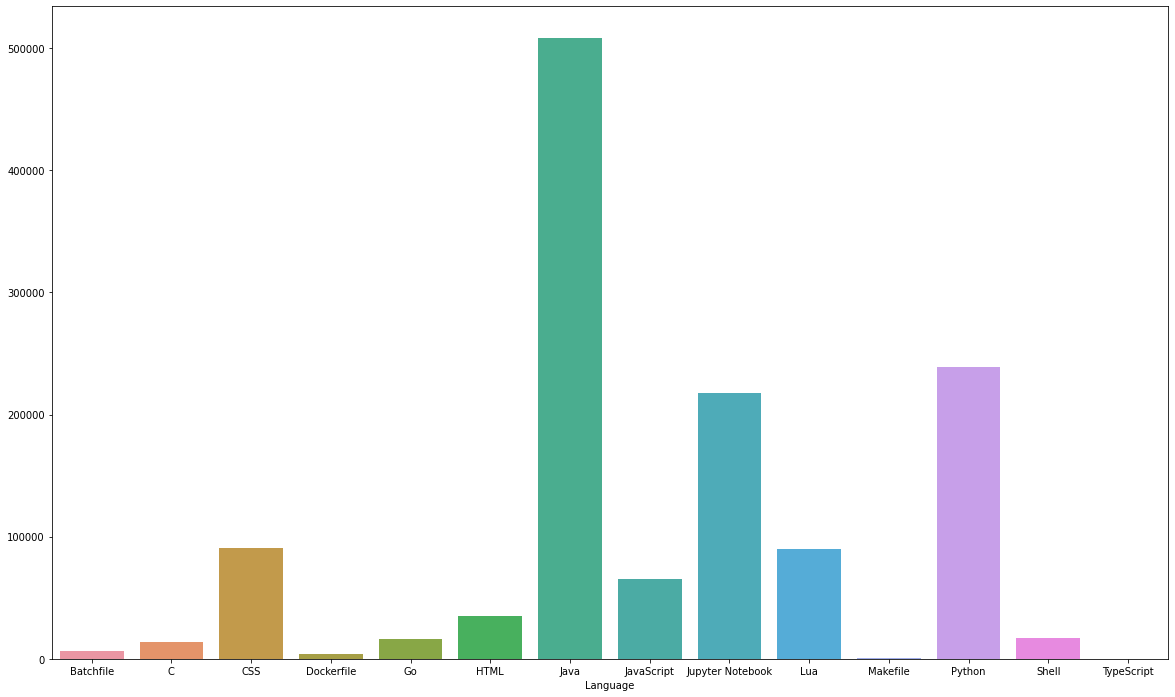

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns


plt.figure(figsize = (20, 12))
sns.barplot(l["Repo Id"].index, l["Size"].values)